## Análisis exploratorio de datos (Cont.)

Para este análisis usamos el dataset "csse_covid_19_time_series" de *Daily reports (csse_covid_19_daily_reports)* en el link https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 

Este es el repositorio de datos para el 2019 Novel Coronavirus Visual Dashboard operado por el Centro de Ciencias e Ingeniería de Sistemas de la Universidad Johns Hopkins (JHU CSSE). Además, con el apoyo del equipo de ESRI Living Atlas y el Laboratorio de Física Aplicada de la Universidad Johns Hopkins (JHU APL).

In [1]:
import pandas as pd

In [2]:
# Leemos los tres conjuntos de datos de casos confirmados, recuperados y fallecidos utilizando su url, 
# así tendremos el dataFrame siempre actualizado
# estos datos son actualizados diariamente
confirmados = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
fallecidos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
# Para visualizar todos los DataFrames en una sola celda uso display
display(confirmados.head())
display(fallecidos.head())
display(recuperados.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,15,16,19,22,22,27,29,29,29,33
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,3


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,34,34,35,35,35,35,41,42,42,42
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,118,118,118,144,144,144,150,191
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,96,96,97,105,105,109,114,114,114,124
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,26,26,26,35,42,42,49,60,75,87


In [4]:
display(confirmados.shape)
display(fallecidos.shape)
display(recuperados.shape)

(477, 63)

(477, 63)

(477, 63)

### Combinar todos los DataFrames 

In [5]:
# uso groupby para agrupar por pais/region 
confirmados.groupby('Country/Region').sum()['3/20/20'].head()

Country/Region
Afghanistan    24
Albania        70
Algeria        90
Andorra        75
Angola          1
Name: 3/20/20, dtype: int64

In [6]:
confirmados.shape

(477, 63)

In [ ]:
# para obtener los datos de la ultima columna del DataFrame (ultima fecha registrada)
#confirmados.iloc[:,-1]

In [10]:
# Funcion para extraer los datos de la ultima columna de un DataFrame
def ultimo_por_pais(df):
    return df.groupby('Country/Region').sum().iloc[:,-1]

In [11]:
info = [ultimo_por_pais(confirmados), ultimo_por_pais(fallecidos), ultimo_por_pais(recuperados)]

In [12]:
info

[Country/Region
 Afghanistan    24
 Albania        70
 Algeria        90
 Andorra        75
 Angola          1
                ..
 Uzbekistan     33
 Venezuela      42
 Vietnam        91
 Zambia          2
 Zimbabwe        1
 Name: 3/20/20, Length: 162, dtype: int64, Country/Region
 Afghanistan     0
 Albania         2
 Algeria        11
 Andorra         0
 Angola          0
                ..
 Uzbekistan      0
 Venezuela       0
 Vietnam         0
 Zambia          0
 Zimbabwe        0
 Name: 3/20/20, Length: 162, dtype: int64, Country/Region
 Afghanistan     1
 Albania         0
 Algeria        32
 Andorra         1
 Angola          0
                ..
 Uzbekistan      0
 Venezuela       0
 Vietnam        16
 Zambia          0
 Zimbabwe        0
 Name: 3/20/20, Length: 162, dtype: int64]

In [13]:
# necesito concatenar todas las informaciones, pero necesito atribuir el eje 1
info_covid = pd.concat(info, axis=1)
info_covid

,3/20/20,3/20/20,3/20/20
Country/Region,,,
Afghanistan,24,0,1
Albania,70,2,0
Algeria,90,11,32
Andorra,75,0,1
Angola,1,0,0
...,...,...,...
Uzbekistan,33,0,0
Venezuela,42,0,0
Vietnam,91,0,16


In [14]:
info_covid.shape

(162, 3)

In [15]:
# cambiar el nombre de las columnas
info_covid.columns = ['confirmados', 'fallecidos', 'recuperados']
info_covid.head()

,confirmados,fallecidos,recuperados
Country/Region,,,
Afghanistan,24,0,1
Albania,70,2,0
Algeria,90,11,32
Andorra,75,0,1
Angola,1,0,0


### Calculando la tasa de letalidad 

Letalidad se expresa porcentaje. La cantidad de casos letales dentro de los casos que fueron letales y no letales

*Ejemplo*: sea una enfermedad que se sabe que acabó, si afecto a 100 personas de las cuales 5 murieron, la letalidad fue de 5%

*Atención*: si la enfermedad continua existiendo, entonces debemos colocar los datos en un rango de tiempo bien definido
Es muy dificil hablar de letalidad intentando ser preciso durante una epidemia

*Conclusión*: en el inicio es muy común que solo los casos graves sean reportados pero luego este número aumenta

In [16]:
total = info_covid.sum()
total["confirmados"]

272166

In [17]:
# primer intento (no es lo ideal)
tasa_letalidad_1 = total['fallecidos']/total['confirmados']
print(tasa_letalidad_1 * 100)

4.151510475224679


*Interpretación*: 4.15% de las personas de todos los casos confirmados (del conjunto de datos que estamos estudiando) fallecieron.

Esta tasa no es absoluta, por que la epidemia todavía continua. 

*ATENCIÓN*: esta información va cambiar a medida que la pandemia se expanda

### Letalidad por pais

In [18]:
info_covid['fallecidos']/info_covid['confirmados']* 100

Country/Region
Afghanistan     0.000000
Albania         2.857143
Algeria        12.222222
Andorra         0.000000
Angola          0.000000
                 ...    
Uzbekistan      0.000000
Venezuela       0.000000
Vietnam         0.000000
Zambia          0.000000
Zimbabwe        0.000000
Length: 162, dtype: float64

In [19]:
tasa_letalidad_1 = info_covid['fallecidos']/info_covid['confirmados']* 100
# agregando un nueva columna, tasa de letalidad 1
info_covid['tasa_letalidad_1'] = tasa_letalidad_1
info_covid.head()

,confirmados,fallecidos,recuperados,tasa_letalidad_1
Country/Region,,,,
Afghanistan,24,0,1,0.000000
Albania,70,2,0,2.857143
Algeria,90,11,32,12.222222
Andorra,75,0,1,0.000000
Angola,1,0,0,0.000000


Es dificil resumir esta informacion, esto es solo una estimación que puede ser alta o puede ser baja. Puede ser que varios de los casos reportados son de pacientes muy graves que irán a óbito y entonces esta tasa aumentara. 

Queda claro: esto es una estimación!

In [20]:
# segundo intento 
# Siendo que mis datos son hasta la fecha actual, la cantidad de recuperados + fallecidos es el total de los reportados
# puedo realizar otro intento sobre esta muestra
# Ejemplo: si 5 se recuperaron y 1 fallecio entonces la tasa de letalidad es 1/6
tasa_letalidad_2 = total['fallecidos']/(total['fallecidos'] + total['confirmados']) * 100
print(tasa_letalidad_2)

3.9860300213430224


La tasa de mortalidad en este grupo es de 3.9 %. Esta estimacion es cercana a la anterior.

También tener en cuenta que puede ser que la recuperación sea lenta.

In [21]:
# Siendo que mis datos son hasta la fecha actual, la cantidad de recuperados + fallecidos es el total de los reportados
# puedo realizar otro intento sobre esta muestra
# Ejemplo: si 5 se recuperaron y 1 fallecio entonces la tasa de letalidad es 1/6
tasa_letalidad_2 = info_covid['fallecidos'] / (info_covid['recuperados'] + info_covid['fallecidos'])*100
info_covid['tasa_letalidad_2'] = tasa_letalidad_2
info_covid.head()

,confirmados,fallecidos,recuperados,tasa_letalidad_1,tasa_letalidad_2
Country/Region,,,,,
Afghanistan,24,0,1,0.000000,0.000000
Albania,70,2,0,2.857143,100.000000
Algeria,90,11,32,12.222222,25.581395
Andorra,75,0,1,0.000000,0.000000
Angola,1,0,0,0.000000,NaN


Varios casos que no tienen fallecidos y recuperados serán NaN, o puede ser que no tengan recuperados lo que resultará en una tasa de 100%

In [22]:
info_covid.sort_values('tasa_letalidad_1', ascending=False).head(10)

,confirmados,fallecidos,recuperados,tasa_letalidad_1,tasa_letalidad_2
Country/Region,,,,,
Sudan,2,1,0,50.000000,100.000000
Gabon,3,1,0,33.333333,100.000000
Guyana,7,1,0,14.285714,100.000000
Algeria,90,11,32,12.222222,25.581395
Ukraine,29,3,0,10.344828,100.000000
San Marino,144,14,4,9.722222,77.777778
Indonesia,369,32,15,8.672087,68.085106
Italy,47021,4032,4440,8.574892,47.592068
Guatemala,12,1,0,8.333333,100.000000


Existen algunos paises con pocos datos entonces no es una muestra representativa. 

Comparar con la tasa de la OMS. Coincide? que puede estar pasando?

### Histogramas y mortalidad

In [26]:
# Como podemos visualizar esta informacion?
%matplotlib inline

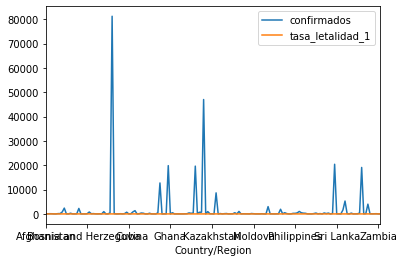

In [27]:
# Cual es la relacion entre confirmados y letalidad?
info_covid[['confirmados', 'tasa_letalidad_1']].plot()

Este grafico no tiene ningun sentido, por que la cantidad de confirmados es superior a 80mil y la tasa de letalidad es menor a 5.

El grafico anterior es horrible! 

In [28]:
# Usemos seaborn
import seaborn as sns

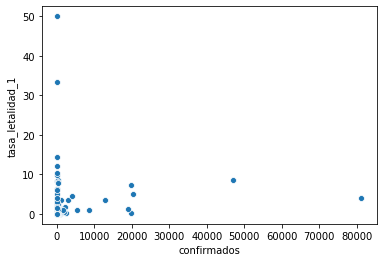

In [29]:
sns.scatterplot(data = info_covid, x="confirmados", y="tasa_letalidad_1")

Cada punto muestra la tasa de letalidad de un pais, por ejemplo China tiene mas de 80mil confirmados aparece al final. De todas formas el grafico esta mejor pero no deja de distinguir mas informacion.

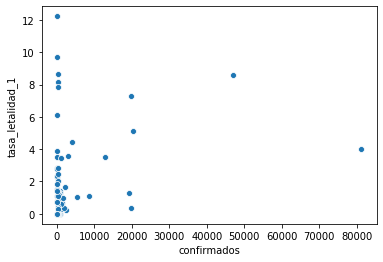

In [30]:
# puedo utilizar un filtro para visualizar los paises con mas de 40 casos confirmados, usamos "query"
sns.scatterplot(data = info_covid.query("confirmados > 40"), x="confirmados", y="tasa_letalidad_1")

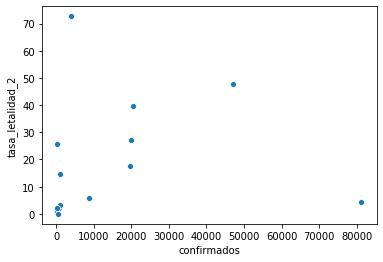

In [33]:
# usando la tasa de letalidad 2
sns.scatterplot(data = info_covid.query("recuperados > 40"), x="confirmados", y="tasa_letalidad_2")

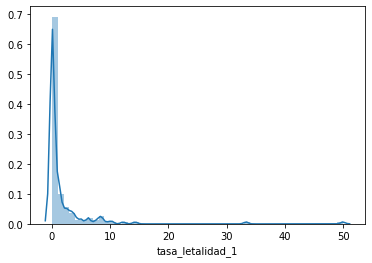

In [34]:
# cual es la distribucion de la tasa de mortalidad por pais
sns.distplot(info_covid["tasa_letalidad_1"])

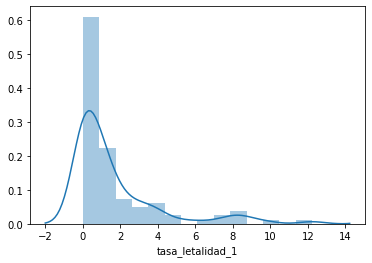

In [35]:
# filtrando confirmados > 40
sns.distplot(info_covid.query("confirmados > 40")["tasa_letalidad_1"])

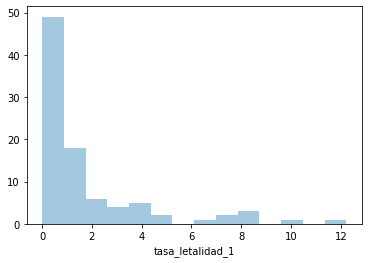

In [36]:
# desactivando kde
sns.distplot(info_covid.query("confirmados > 40")["tasa_letalidad_1"], kde = False)

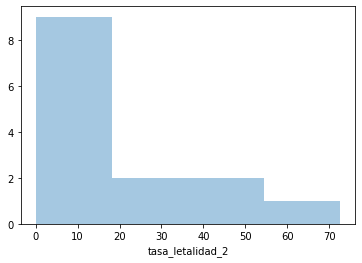

In [37]:
# usando tasa de mortalidad 2
sns.distplot(info_covid.query("recuperados > 40")["tasa_letalidad_2"], kde = False)

In [41]:
# ordenar
info_covid.sort_values("tasa_letalidad_1", ascending=False).query("confirmados > 100").head(10)

,confirmados,fallecidos,recuperados,tasa_letalidad_1,tasa_letalidad_2
Country/Region,,,,,
San Marino,144,14,4,9.722222,77.777778
Indonesia,369,32,15,8.672087,68.085106
Italy,47021,4032,4440,8.574892,47.592068
Iraq,208,17,49,8.173077,25.757576
Philippines,230,18,8,7.826087,69.230769
Iran,19644,1433,6745,7.294848,17.522622
Spain,20410,1043,1588,5.110240,39.642721
United Kingdom,4014,178,67,4.434479,72.653061
China,81250,3253,71266,4.003692,4.365330


en algunos paises todavia no hay muchos recuperados, necesitan mas tiempo

### Comparando informes

In [59]:
# definiendo una funcion para calcular la tasa de mortalidad en un dia especifico
def ultimo_por_pais_en(data, fecha):
    return data.groupby("Country/Region").sum()[fecha]

In [56]:
info = [ultimo_por_pais_en(confirmados, '2/20/20'), ultimo_por_pais_en(fallecidos, '2/20/20'), ultimo_por_pais_en(recuperados, '2/20/20')]
info_covid_2_20_20 = pd.concat(info, axis=1)
info_covid_2_20_20.columns = ["confirmados", "fallecidos", "recuperados"]

In [57]:
# comparar con https://www.worldometers.info/coronavirus/coronavirus-death-rate/
total_2_20_20 = info_covid_2_20_20.loc['China']
tasa_mortalidad_1 = total_2_20_20["fallecidos"]/total_2_20_20["confirmados"] * 100
tasa_mortalidad_2 = total_2_20_20["fallecidos"]/(total_2_20_20["confirmados"] + total_2_20_20["recuperados"]) * 100
print(tasa_mortalidad_1)
print(tasa_mortalidad_2)

2.980939568709458
2.4040992147468607


In [58]:
# comparar el 3 de marzo
info = [ultimo_por_pais_en(confirmados, '3/3/20'), ultimo_por_pais_en(fallecidos, '3/3/20'), ultimo_por_pais_en(recuperados, '3/3/20')]
info_covid_3_3_20 = pd.concat(info, axis=1)
info_covid_3_3_20.columns = ["confirmados", "fallecidos", "recuperados"]

total_3_3_20 = info_covid_3_3_20.loc['China']
tasa_mortalidad_1 = total_3_3_20["fallecidos"]/total_3_3_20["confirmados"] * 100
tasa_mortalidad_2 = total_3_3_20["fallecidos"]/(total_3_3_20["confirmados"] + total_3_3_20["recuperados"]) * 100
print(tasa_mortalidad_1)
print(tasa_mortalidad_2)


3.6717708476096735
2.3075537737548055


### Analizando fechas diferentes

How to calculate the mortality rate during an outbreak (https://www.worldometers.info/coronavirus/coronavirus-death-rate/)

In [64]:
# en un rango de dias
# def ultimo_por_pais_en(data, fecha):
#    return data.groupby("Country/Region").sum()[fecha]

# comparar segun el dia de aparicion de los sintomas
info = [ultimo_por_pais_en(confirmados, '2/8/20'), ultimo_por_pais_en(fallecidos, '2/20/20'), ultimo_por_pais_en(recuperados, '2/20/20')]
info_covid_12 = pd.concat(info, axis=1)
info_covid_12.columns = ["confirmados", "fallecidos", "recuperados"]

total_12 = info_covid_12.loc['China']
tasa_mortalidad_3 = total_12["fallecidos"]/total_12["confirmados"] * 100
#tasa_mortalidad_2 = total_12["fallecidos"]/(total_12["confirmados"] + total_12["recuperados"]) * 100
print(tasa_mortalidad_3)
#print(tasa_mortalidad_2)
display(total_12)

6.079208996577389


confirmados    36814
fallecidos      2238
recuperados    18014
Name: China, dtype: int64

Explicar https://www.worldometers.info/coronavirus/coronavirus-age-sex-demographics/

*Conclusion*: Tenemos que ser responsables con la informacion que mostramos. Por que no son los datos, por eso debemos explicar muy bien todo lo que mostramos.